In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import json
from keras import layers

## 데이터 안의 혈압약 찾기
- 몇 번 압축파일에 혈압약이 있지 찾기
- 혈압약 코드 찾기

In [2]:
dirs = 'C:/Users/Chaddol/Downloads/166.약품식별 인공지능 개발을 위한 경구약제 이미지 데이터/01.데이터/1.Training/라벨링데이터/단일경구약제 5000종'
# dirs = dirs.replace('\\', '/', 10)
dirs_in = glob.glob(dirs + '/*')
print(len(dirs_in), type(dirs_in))
set_name = []
for s in dirs_in:  #set_name 은 TL_00_단일 이런 형식
    set_name += glob.glob(s + '/*')

# print(set_name[:10])
# print(dirs_in[:10])


81 <class 'list'>


In [3]:
files = []
check = []
data_set = []
for name in set_name:
    files = glob.glob(name + '/*')
    f = files[0]
    check.append(f)
# print(check[:10])


In [4]:
len('C:/Users/Chaddol/Downloads/166.약품식별 인공지능 개발을 위한 경구약제 이미지 데이터/01.데이터/1.Training/라벨링데이터/단일경구약제 5000종\\'), len('\\K-019469_json\\K-019469_0_0_0_0_60_000_200.json')

(99, 47)

In [5]:
bp_drug_names = []
for file in check:
    with open(file, 'r', encoding='UTF-8') as j:
        js = json.load(j)
        di_class = js['images'][0]['di_class_no']
        if di_class == "[02140]혈압강하제":  # 여기에 코드와 약 종류를 입력하면 (json 파일의 di_class_no) 러프하게 찾아준다. f 에 해당하는 파일이 없는 폴더도 존재하기 때문.
            target = js['images'][0]['file_name'][:8]
            bp_drug_names.append(target)
            data_set_name = file[99:107]
            data_set.append(data_set_name.strip('\\'))
            # print(file)

In [6]:
bp_drug_dataset = list(set(data_set))
len(bp_drug_dataset)

72

In [7]:
bp_drug_names, len(bp_drug_names)

(['K-019699',
  'K-019700',
  'K-019861',
  'K-019867',
  'K-020378',
  'K-020379',
  'K-020401',
  'K-020834',
  'K-020877',
  'K-023252',
  'K-023357',
  'K-023779',
  'K-023829',
  'K-023838',
  'K-024162',
  'K-025000',
  'K-025033',
  'K-025469',
  'K-025470',
  'K-025728',
  'K-025886',
  'K-026694',
  'K-027187',
  'K-027188',
  'K-027733',
  'K-027735',
  'K-027840',
  'K-028010',
  'K-028081',
  'K-028129',
  'K-028130',
  'K-028360',
  'K-028588',
  'K-028813',
  'K-030005',
  'K-030063',
  'K-030064',
  'K-030690',
  'K-031543',
  'K-031545',
  'K-035291',
  'K-036170',
  'K-036171',
  'K-036172',
  'K-037086',
  'K-039150',
  'K-040099',
  'K-040639',
  'K-040671',
  'K-040996',
  'K-041947',
  'K-041948',
  'K-041949',
  'K-042118',
  'K-042119',
  'K-042120',
  'K-051326',
  'K-000798',
  'K-000869',
  'K-001095',
  'K-001103',
  'K-001462',
  'K-001579',
  'K-001642',
  'K-001677',
  'K-001707',
  'K-001755',
  'K-001899',
  'K-002593',
  'K-002651',
  'K-002672',
  'K-0

위 정보를 통해 혈압약이 들어 있는 압축 파일 중 가장 크기가 작은 81번 데이터 셋을 활용했습니다.

## 데이터 전처리
- 아래 코드는 전처리에 사용됩니다. 현재 용량이 너무 커서 원본을 삭제해서 동작하지 않습니다.

In [8]:
# dir_1 = glob.glob('Data/1.Training/labeling_data/drug/*')
# json_names = []
# for temp_dir in dir_1:
#     json_names += glob.glob(temp_dir + '/*.*')
# # print(json_names[:3])

# temp_img_dir = glob.glob('Data/1.Training/raw_data/drug/*')
# # print(len(temp_img_dir))
# img_names = []
# for temp in temp_img_dir:
#     img_names += glob.glob(temp + '/*.*')

# # print(img_names[:10])
# i = 0
# # os.mkdir('Data/1.Training/images/' + 'hi')
# for idx, img_data in enumerate(json_names):
#     img_data = img_data.replace('\\', '/', 10)
#     # print(img_data)
#     with open(img_data, 'r', encoding='UTF=8') as j:
#         js = json.load(j)
#         file_name = js['images'][0]['file_name']
#         file_dir = 'Data/1.Training/images/' + file_name[:8]
#         if not os.path.isdir(file_dir):
#             os.mkdir(file_dir)

#         file_dir = file_dir + '/' + file_name

#         if not os.path.isfile(file_dir):
#             # print(file_dir)
#             x, y, w, h = js['annotations'][0]['bbox']

#             cx = x + w // 2
#             cy = y + h // 2
#             w_h, h_h = max(w, h), max(w, h)  # 깨끗한 data 를 얻기 위해 크롭영역을 정방형으로 해준다. 기준은 둘 중 큰 값
#             x = cx - (w_h // 2)
#             y = cy - (h_h // 2)

#             # print(x, y, w, h)
#             img_names[idx] = img_names[idx].replace('\\', '/', 10)
#             # print(img_names[idx])
#             img = cv2.imread(img_names[idx], cv2.IMREAD_COLOR)
#             cropped_img = img[y:y + h_h, x:x + w_h]
#             cropped_img = cv2.resize(cropped_img, (64, 64))
#             if idx % 100 == 0:
#                 print('진행상황: {} / {}'.format(idx, len(img_names)))
#             cv2.imwrite(file_dir, cropped_img)
#         else:
#             print('이미 처리한 데이터 입니다.')
#             continue


In [9]:
mother_dir = 'images/'
folder_list = os.listdir(mother_dir)

In [10]:
img_file_names = []
for x in folder_list:
  img_file_names += glob.glob(mother_dir + '/' + x + '/*.*')

print(len(img_file_names))
for i in range(10):
  print(img_file_names[i]) 

9612
images//K-038884\K-038884_0_0_0_0_75_000_200.png
images//K-038884\K-038884_0_0_0_0_75_020_200.png
images//K-038884\K-038884_0_0_0_0_75_040_200.png
images//K-038884\K-038884_0_0_0_0_75_060_200.png
images//K-038884\K-038884_0_0_0_0_75_080_200.png
images//K-038884\K-038884_0_0_0_0_75_100_200.png
images//K-038884\K-038884_0_0_0_0_75_120_200.png
images//K-038884\K-038884_0_0_0_0_75_140_200.png
images//K-038884\K-038884_0_0_0_0_75_160_200.png
images//K-038884\K-038884_0_0_0_0_75_180_200.png


In [11]:
cls = {}
for idx,folder in enumerate(folder_list):
  cls[folder] = idx

cls

{'K-038884': 0,
 'K-038890': 1,
 'K-038896': 2,
 'K-038910': 3,
 'K-038912': 4,
 'K-038913': 5,
 'K-038914': 6,
 'K-038927': 7,
 'K-038929': 8,
 'K-038954': 9,
 'K-038958': 10,
 'K-038959': 11,
 'K-038962': 12,
 'K-038967': 13,
 'K-038970': 14,
 'K-039021': 15,
 'K-039036': 16,
 'K-039047': 17,
 'K-039104': 18,
 'K-039108': 19,
 'K-039123': 20,
 'K-039136': 21,
 'K-039146': 22,
 'K-039147': 23}

In [12]:
x_train_names, x_test_names = train_test_split(img_file_names, test_size=0.2, random_state=1)
x_train_names[:10]

['images//K-038929\\K-038929_0_0_0_1_75_320_200.png',
 'images//K-038896\\K-038896_0_1_0_1_90_100_200.png',
 'images//K-039047\\K-039047_0_2_1_0_90_080_200.png',
 'images//K-038910\\K-038910_0_0_0_0_70_200_200.png',
 'images//K-039147\\K-039147_0_0_1_0_75_120_200.png',
 'images//K-039147\\K-039147_0_1_1_2_70_300_200.png',
 'images//K-039147\\K-039147_0_2_0_1_90_120_200.png',
 'images//K-038929\\K-038929_0_0_0_2_70_100_200.png',
 'images//K-039047\\K-039047_0_2_0_0_90_180_200.png',
 'images//K-039136\\K-039136_0_1_0_2_75_160_200.png']

In [13]:
s = 8

In [14]:
x_train = []
y_train = []

for idx, x in enumerate(x_train_names):
  if idx % 100 == 0:
    print(x)
  img = cv2.cvtColor(cv2.imread(x, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
  id = x[s:s+8]
  temp_cls = cls[id]
  y_train.append(temp_cls)
  x_train.append(img)


x_train = np.array(x_train)
y_train = np.array(y_train)

images//K-038929\K-038929_0_0_0_1_75_320_200.png
images//K-038910\K-038910_0_0_0_0_75_260_200.png
images//K-038958\K-038958_0_2_0_0_75_240_200.png
images//K-038967\K-038967_0_2_1_1_70_220_200.png
images//K-038954\K-038954_0_2_1_1_70_100_200.png
images//K-039136\K-039136_0_1_0_1_60_300_200.png
images//K-038970\K-038970_0_2_1_0_90_180_200.png
images//K-038954\K-038954_0_2_1_0_75_280_200.png
images//K-039147\K-039147_0_0_1_1_60_260_200.png
images//K-039147\K-039147_0_1_0_1_60_340_200.png
images//K-039147\K-039147_0_2_1_1_75_020_200.png
images//K-038890\K-038890_0_0_1_1_75_320_200.png
images//K-038890\K-038890_0_0_0_1_90_300_200.png
images//K-039146\K-039146_0_2_0_2_90_060_200.png
images//K-039108\K-039108_0_0_0_0_75_000_200.png
images//K-038914\K-038914_0_0_1_2_90_020_200.png
images//K-039147\K-039147_0_0_0_0_75_260_200.png
images//K-038912\K-038912_0_0_0_1_90_020_200.png
images//K-039146\K-039146_0_2_0_2_90_300_200.png
images//K-039146\K-039146_0_2_1_2_75_060_200.png
images//K-038914\K-0

In [15]:
# x_train = np.array(x_train)
x_train = np.array(x_train)/255
x_train

array([[[[0.41568627, 0.28627451, 0.21960784],
         [0.41568627, 0.2745098 , 0.23137255],
         [0.41568627, 0.2745098 , 0.21960784],
         ...,
         [0.39607843, 0.27843137, 0.22352941],
         [0.39607843, 0.28235294, 0.22745098],
         [0.38823529, 0.28627451, 0.21960784]],

        [[0.41568627, 0.28627451, 0.21568627],
         [0.41568627, 0.2745098 , 0.21960784],
         [0.41568627, 0.2745098 , 0.21960784],
         ...,
         [0.40784314, 0.27058824, 0.21176471],
         [0.41176471, 0.26666667, 0.21176471],
         [0.39607843, 0.27843137, 0.21960784]],

        [[0.41568627, 0.29411765, 0.21960784],
         [0.42352941, 0.29019608, 0.21960784],
         [0.42745098, 0.28235294, 0.21176471],
         ...,
         [0.39607843, 0.28235294, 0.22745098],
         [0.39607843, 0.27843137, 0.21960784],
         [0.40392157, 0.2745098 , 0.21176471]],

        ...,

        [[0.43529412, 0.29411765, 0.21960784],
         [0.42352941, 0.29019608, 0.22745098]

In [16]:
y_train = y_train.reshape(-1,1)
y_train.shape

(7689, 1)

In [17]:
x_test, y_test = [], []

for idx, x in enumerate(x_test_names):
  if idx % 100 == 0:
    print(x)
  img = cv2.cvtColor(cv2.imread(x, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
  id = x[s:s+8]
  temp_cls = cls[id]
  y_test.append(temp_cls)
  x_test.append(img)


x_test = np.array(x_test)
y_test = np.array(y_test)
# for idx, x in enumerate(x_test_names):
#   if idx % 100 == 0:
#     print('{} / {}'.format(idx, len(x_test_names)))
#   f = tf.io.read_file(x)
#   img = tf.io.decode_image(f)
#   x_test.append(img)
#   id = x[s:s+8]
#   temp_cls = cls[id]
#   y_test.append(temp_cls)

images//K-039136\K-039136_0_1_0_0_70_180_200.png
images//K-038958\K-038958_0_2_0_1_90_000_200.png
images//K-039021\K-039021_0_2_0_2_90_040_200.png
images//K-039147\K-039147_0_0_0_1_75_160_200.png
images//K-038896\K-038896_0_1_0_2_90_120_200.png
images//K-038910\K-038910_0_0_1_0_70_100_200.png
images//K-039136\K-039136_0_1_0_2_60_120_200.png
images//K-038970\K-038970_0_2_0_0_90_100_200.png
images//K-038927\K-038927_0_0_1_2_90_080_200.png
images//K-038912\K-038912_0_0_0_2_75_140_200.png
images//K-039147\K-039147_0_2_1_1_70_260_200.png
images//K-039147\K-039147_0_2_1_0_60_000_200.png
images//K-039136\K-039136_0_2_0_1_70_020_200.png
images//K-039108\K-039108_0_0_0_0_90_240_200.png
images//K-038914\K-038914_0_0_0_0_90_120_200.png
images//K-039146\K-039146_0_1_0_1_70_080_200.png
images//K-039047\K-039047_0_2_1_0_90_240_200.png
images//K-038913\K-038913_0_0_0_0_75_240_200.png
images//K-039147\K-039147_0_2_1_1_60_060_200.png
images//K-039021\K-039021_0_2_1_2_90_240_200.png


In [18]:
x_test = x_test/255
y_test = y_test.reshape(-1,1)

In [19]:
x_test.shape, y_test.shape

((1923, 64, 64, 3), (1923, 1))

In [22]:
saved_model = './drug.h5'
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10,restore_best_weights=True)
mc = tf.keras.callbacks.ModelCheckpoint(saved_model, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [25]:
model1 = tf.keras.models.Sequential()
#
model1.add(tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',input_shape=(64,64,3)))  # conv2d 수행하면 64채널의 결과가 나오고, kernelsize = 3
model1.add(tf.keras.layers.Dropout(rate=0.5))                          #  DO1
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#
model1.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.5))                          # DO2
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#
model1.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.5))                           # DO3
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(len(cls), activation='softmax'))
#
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       2

In [26]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
               
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [27]:
history = model1.fit(x_train, y_train,
          epochs = 100,
          callbacks=[es, mc],
          batch_size = 32,
          validation_data = (x_test, y_test))

Epoch 1/100
241/241 [==============================] - 8s 18ms/step - loss: 1.1040 - accuracy: 0.6261 - val_loss: 1.4306 - val_accuracy: 0.7873

Epoch 00001: val_accuracy improved from -inf to 0.78731, saving model to .\drug.h5
Epoch 2/100
241/241 [==============================] - 4s 15ms/step - loss: 0.4863 - accuracy: 0.7991 - val_loss: 1.4520 - val_accuracy: 0.7161

Epoch 00002: val_accuracy did not improve from 0.78731
Epoch 3/100
241/241 [==============================] - 4s 15ms/step - loss: 0.3588 - accuracy: 0.8419 - val_loss: 1.2278 - val_accuracy: 0.8211

Epoch 00003: val_accuracy improved from 0.78731 to 0.82111, saving model to .\drug.h5
Epoch 4/100
241/241 [==============================] - 4s 15ms/step - loss: 0.3392 - accuracy: 0.8426 - val_loss: 1.1087 - val_accuracy: 0.8331

Epoch 00004: val_accuracy improved from 0.82111 to 0.83307, saving model to .\drug.h5
Epoch 5/100
241/241 [==============================] - 4s 15ms/step - loss: 0.3235 - accuracy: 0.8562 - val_lo

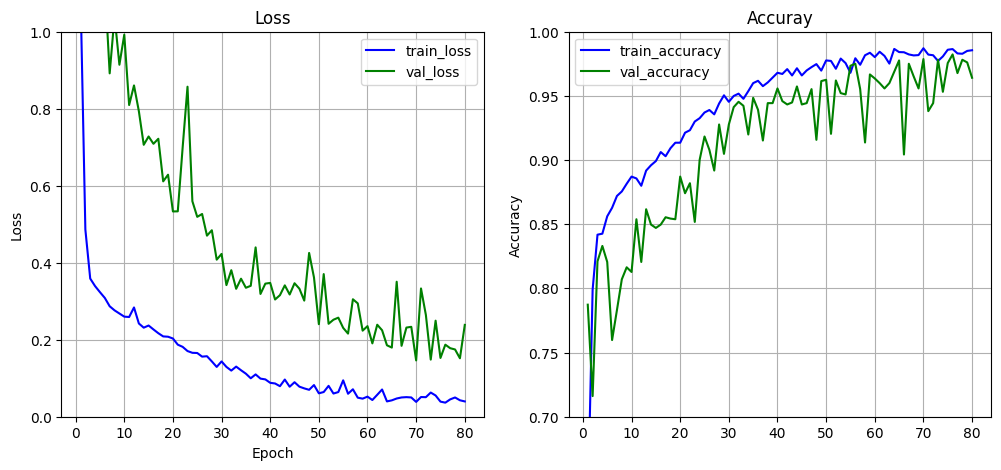

In [28]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,1.0])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
test_data = cv2.imread()

위 모델의 결과 98%의 정확도로 예측합니다. 하지만, overfitting이 의심됩니다.

따라서 유명한 resNet 을 기반으로 fine-tuning을 진행해보고자 합니다.

In [29]:
# def residual_block(x, filters_in, filters_out, k_size):
#     shortcut = x
#     x = layers.Conv2D(filters_in, kernel_size=(1,1), strides=(1,1), padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.LeakyReLU()(x)
    
#     x = layers.Conv2D(filters_in, kernel_size=(k_size, k_size), strides=(1, 1), padding="same")(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.LeakyReLU()(x)    
    
#     x = layers.Conv2D(filters_out, kernel_size=(1, 1), strides=(1, 1), padding="same")(x)
#     x = layers.BatchNormalization()(x)
    
#     shortcut_channel = x.shape.as_list()[-1]
    
#     if shortcut_channel != filters_out:
#         shortcut = layers.Conv2D(filters_out, kernel_size=(1, 1), strides=(1, 1), padding="same")(shortcut)
        
#     x = layers.Add()([x, shortcut])
#     return layers.LeakyReLU()(x)

In [30]:
def identity_block(x, filters_in)

SyntaxError: invalid syntax (2649724827.py, line 1)